In [24]:
import matplotlib.pyplot as plt
from src.utils import apply_matplotlib_settings
from src.quant.long_run_growth.utils import (
    get_data,
    get_code_to_name,
    get_country_active_years,
    get_gdp_pc,
    create_color_map,
    Event,
    plot_with_events,
)

apply_matplotlib_settings()

In [2]:
data = get_data(sheet_name="Full data")
data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


In [3]:
country_years = get_country_active_years(data)
code_to_name = get_code_to_name(data)
gdp_pc = get_gdp_pc(data)
gdp_pc.tail()

year,1,730,1000,1090,1120,1252,1253,1254,1255,1256,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
countrycode,,,,,,,,,,,,,,,,,,,,,
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4593.5427,4812.3454,4088.0,4077.0,4165.0,4054.0,2844.0,2506.0,2321.9239,2284.8899
YUG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14028.4195,14250.7895,14540.0,14331.0,14500.0,14627.0,14971.0,15416.0,15960.8432,16558.3123
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10873.0463,11318.6045,11838.0,11992.0,12171.0,12242.0,12246.0,12139.0,12189.3579,12165.7948
ZMB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2743.3219,3032.0679,3205.0,3350.0,3419.0,3478.0,3478.0,3479.0,3497.5818,3534.0337
ZWE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1285.0466,1401.8565,1515.0,1604.0,1604.0,1594.0,1560.0,1534.0,1582.3662,1611.4052


In [4]:
color_mapping = create_color_map(data)

### UK

In [5]:
gdp_pc.loc["GBR"]

year
1              NaN
730            NaN
1000     1151.0000
1090           NaN
1120           NaN
           ...    
2014    36436.0000
2015    36941.0000
2016    37334.0000
2017    37782.8283
2018    38058.0856
Name: GBR, Length: 772, dtype: float64

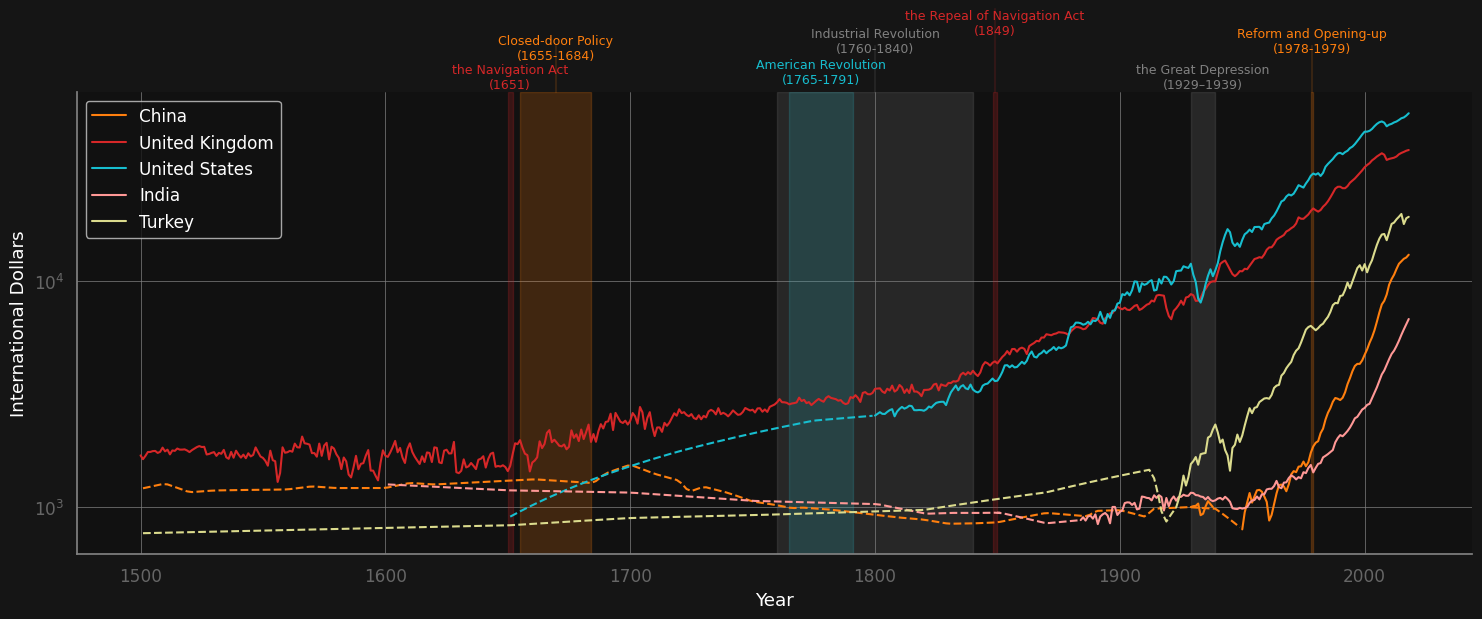

In [6]:
world_events = [
    Event(
        (1650, 1652),
        1.04,
        "the Navigation Act\n(1651)",
        color_mapping["GBR"],
        1,
    ),
    Event(
        (1655, 1684),
        1.40,
        "Closed-door Policy\n(1655-1684)",
        color_mapping["CHN"],
        1.1,
    ),
    Event(
        (1848, 1850),
        1.80,
        "the Repeal of Navigation Act\n(1849)",
        color_mapping["GBR"],
        1.18,
    ),
    Event(
        (1765, 1791),
        1.10,
        "American Revolution\n(1765-1791)",
        color_mapping["USA"],
        1,
    ),
    Event(
        (1760, 1840),
        1.50,
        "Industrial Revolution\n(1760-1840)",
        "grey",
        1.1,
    ),
    Event(
        (1929, 1939),
        1.04,
        "the Great Depression\n(1929–1939)",
        "grey",
        1,
    ),
    Event(
        (1978, 1979),
        1.50,
        "Reform and Opening-up\n(1978-1979)",
        color_mapping["CHN"],
        1.1,
    ),
]

plot_with_events(
    countries=["CHN", "GBR", "USA", "IND", "TUR"],
    country_codes=code_to_name,
    color_mapping=color_mapping,
    gdp_pc=gdp_pc,
    start_year=1500,
    end_year=2022,
    events=world_events,
)

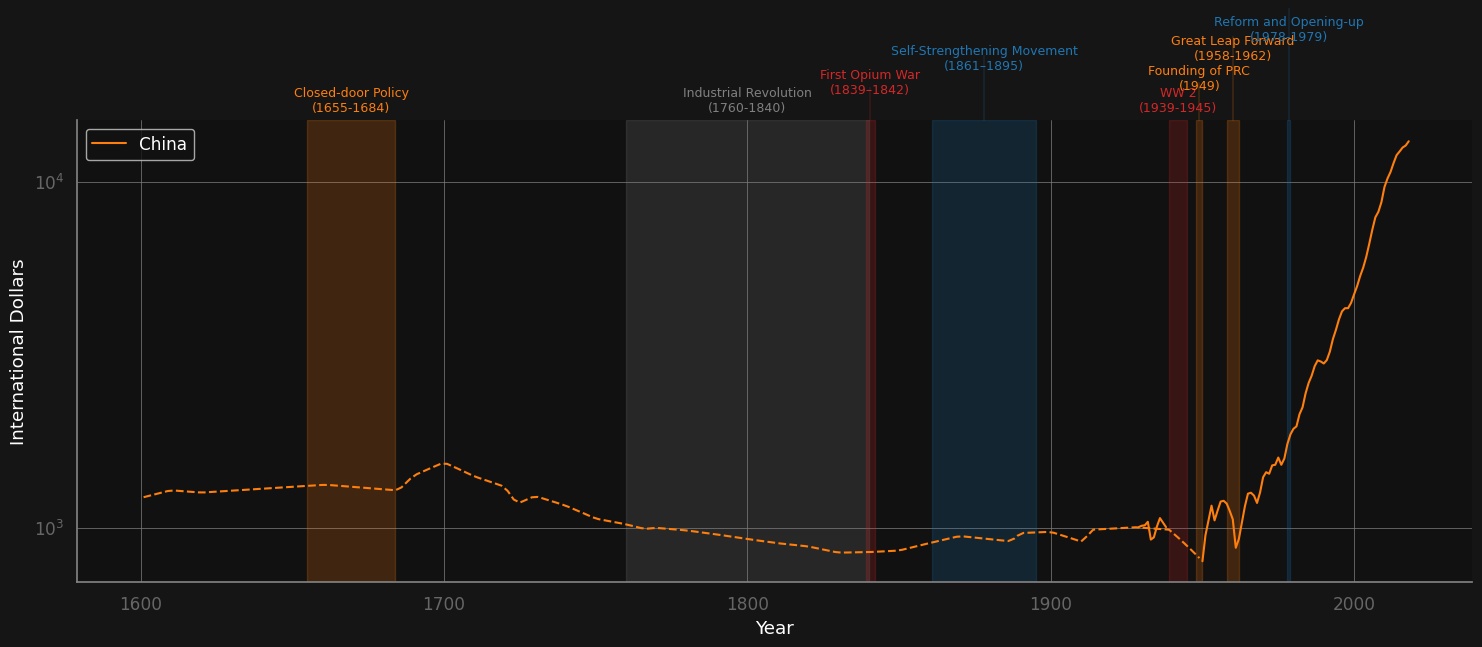

In [7]:
chinese_events = [
    Event(
        (1655, 1684),
        1.06,
        "Closed-door Policy\n(1655-1684)",
        "tab:orange",
        1,
    ),
    Event(
        (1760, 1840),
        1.06,
        "Industrial Revolution\n(1760-1840)",
        "grey",
        1,
    ),
    Event(
        (1839, 1842),
        1.2,
        "First Opium War\n(1839–1842)",
        "tab:red",
        1.07,
    ),
    Event(
        (1861, 1895),
        1.4,
        "Self-Strengthening Movement\n(1861–1895)",
        "tab:blue",
        1.14,
    ),
    Event((1939, 1945), 1.06, "WW 2\n(1939-1945)", "tab:red", 1),
    Event(
        (1948, 1950),
        1.23,
        "Founding of PRC\n(1949)",
        color_mapping["CHN"],
        1.08,
    ),
    Event(
        (1958, 1962),
        1.5,
        "Great Leap Forward\n(1958-1962)",
        "tab:orange",
        1.18,
    ),
    Event(
        (1978, 1979),
        1.7,
        "Reform and Opening-up\n(1978-1979)",
        "tab:blue",
        1.24,
    ),
]

plot_with_events(
    countries=["CHN"],
    country_codes=code_to_name,
    color_mapping=color_mapping,
    gdp_pc=gdp_pc,
    start_year=1600,
    end_year=2022,
    events=chinese_events,
)

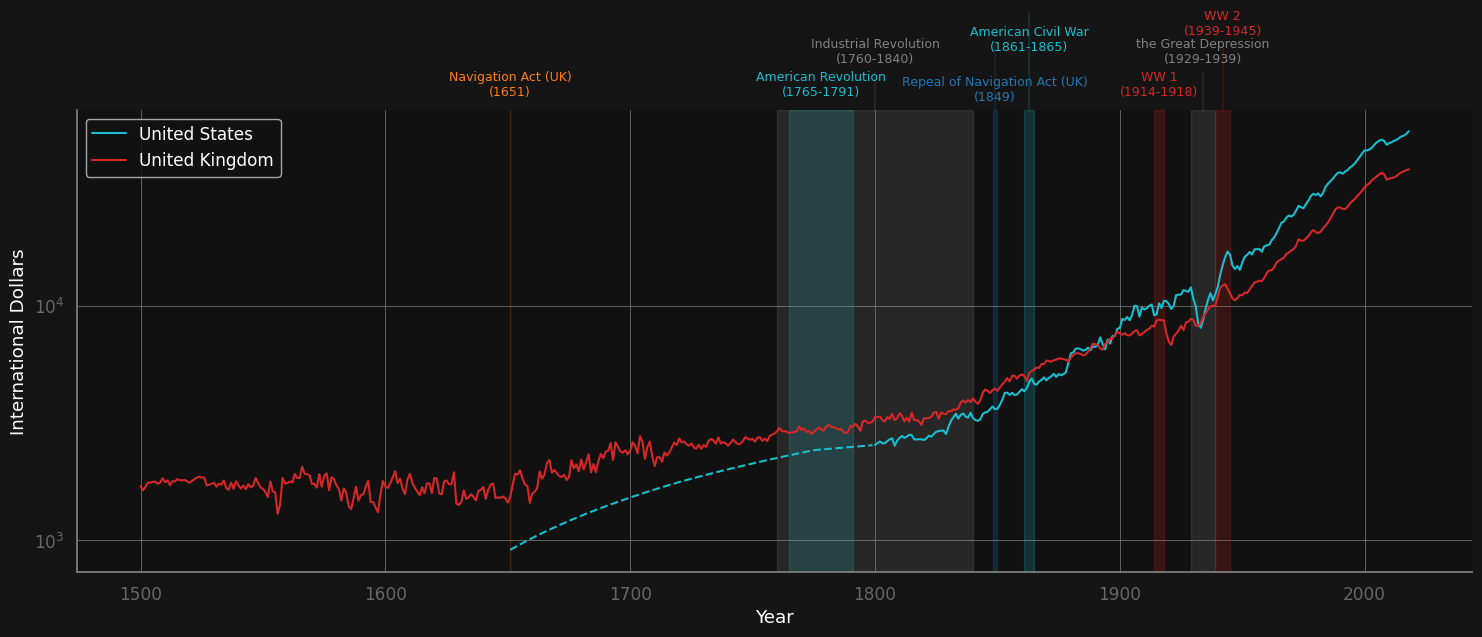

In [8]:
british_events = [
    Event(
        (1651, 1651),
        1.15,
        "Navigation Act (UK)\n(1651)",
        "tab:orange",
        1,
    ),
    Event(
        (1848, 1850),
        1.1,
        "Repeal of Navigation Act (UK)\n(1849)",
        "tab:blue",
        1.14,
    ),
]

global_events = [
    Event(
        (1760, 1840),
        1.6,
        "Industrial Revolution\n(1760-1840)",
        "grey",
        1.08,
    ),
    Event((1914, 1918), 1.15, "WW 1\n(1914-1918)", "tab:red", 1),
    Event(
        (1939, 1945),
        2.1,
        "WW 2\n(1939-1945)",
        "tab:red",
        1.14,
    ),
]

american_events = [
    Event(
        (1765, 1791),
        1.15,
        "American Revolution\n(1765-1791)",
        color_mapping["USA"],
        1,
    ),
    Event(
        (1861, 1865),
        1.8,
        "American Civil War\n(1861-1865)",
        color_mapping["USA"],
        1.21,
    ),
    Event(
        (1929, 1939),
        1.6,
        "the Great Depression\n(1929-1939)",
        "grey",
        1.08,
    ),
]

plot_with_events(
    countries=["USA", "GBR"],
    country_codes=code_to_name,
    color_mapping=color_mapping,
    gdp_pc=gdp_pc,
    start_year=1500,
    end_year=2022,
    events=[*british_events, *american_events, *global_events],
)

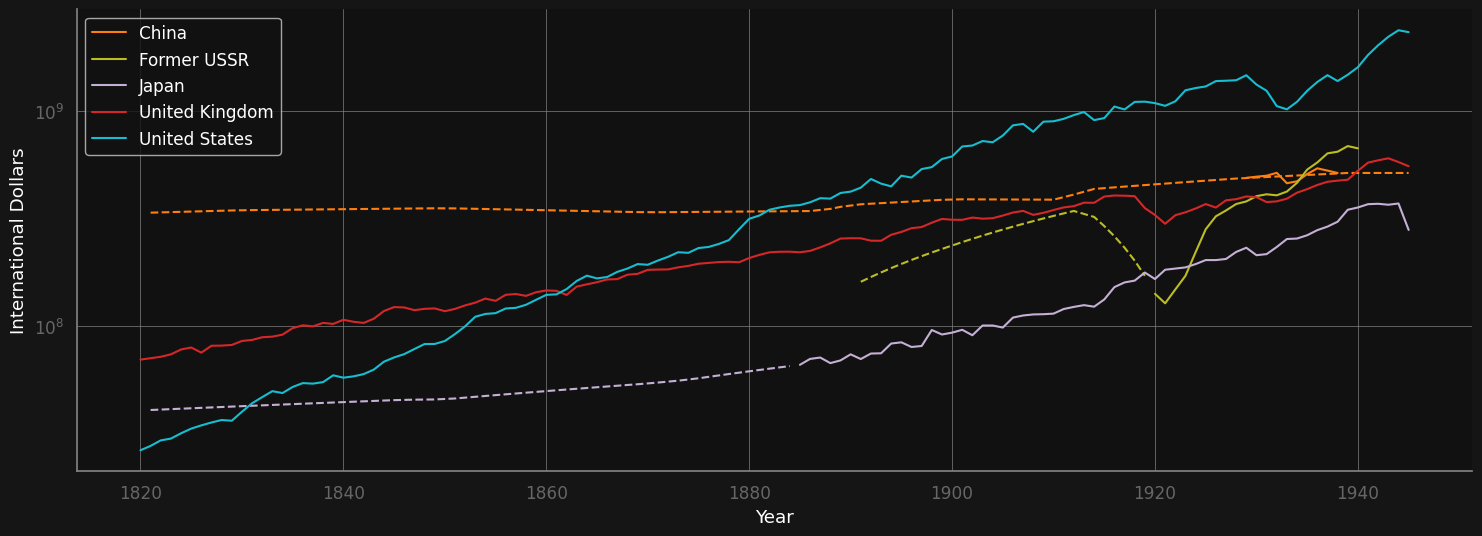

In [9]:
# import matplotlib.pyplot as plt

d = data.set_index(["countrycode", "year"])
d["gdp"] = d["gdppc"] * d["pop"]
gdp = d["gdp"]

country = "CHN SUN JPN GBR USA".upper().split(" ")
start_year = 1820
end_year = 1945

plot_with_events(
    countries=country,
    country_codes=code_to_name,
    color_mapping=color_mapping,
    gdp_pc=gdp,
    start_year=start_year,
    end_year=end_year,
    events=[],
)

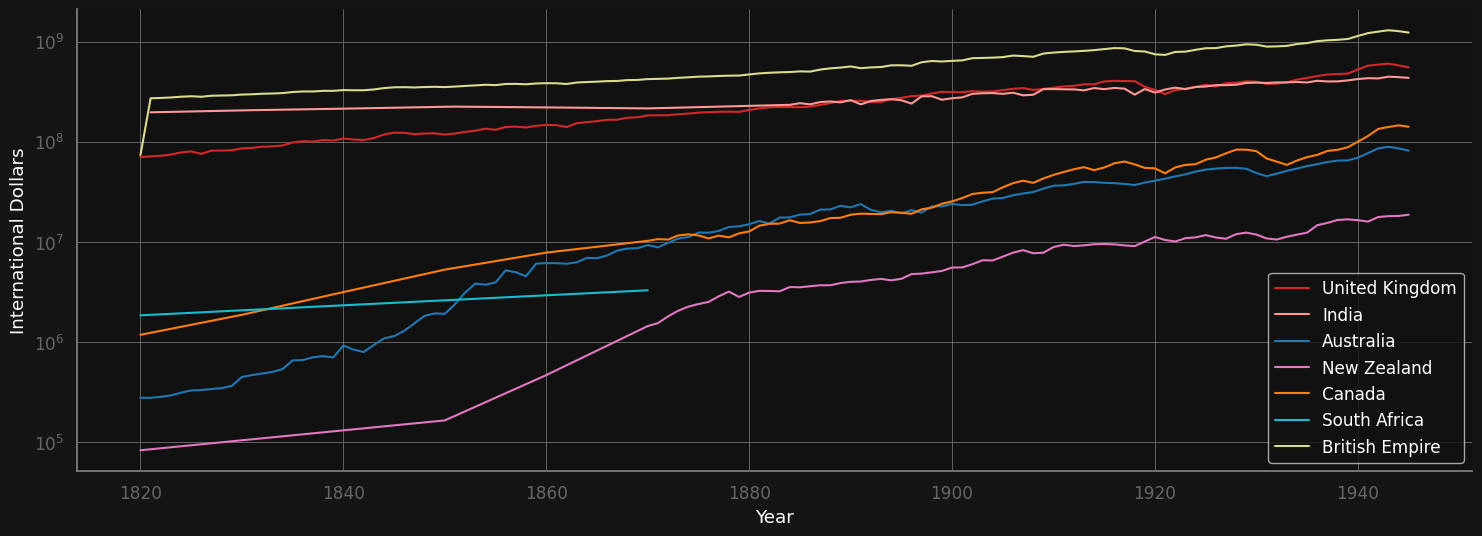

In [10]:
import pandas as pd

BEM = ["GBR", "IND", "AUS", "NZL", "CAN", "ZAF"]
start_year = 1820
end_year = 1945

d = data.set_index(["countrycode", "year"])
d["gdp"] = d["gdppc"] * d["pop"]
gdp = d["gdp"].unstack("countrycode")
gdp["BEM"] = (
    gdp[BEM]
    .loc[start_year - 1 : end_year]
    .interpolate(method="index")
    .sum(axis=1)
)
color_mapping["BEM"] = color_mapping["TUR"]
code_to_name.loc["BEM"] = "British Empire"

plot_with_events(
    countries=[*BEM, "BEM"],
    country_codes=code_to_name,
    color_mapping=color_mapping,
    gdp_pc=gdp.stack().swaplevel(),
    start_year=start_year,
    end_year=end_year,
    events=[],
)

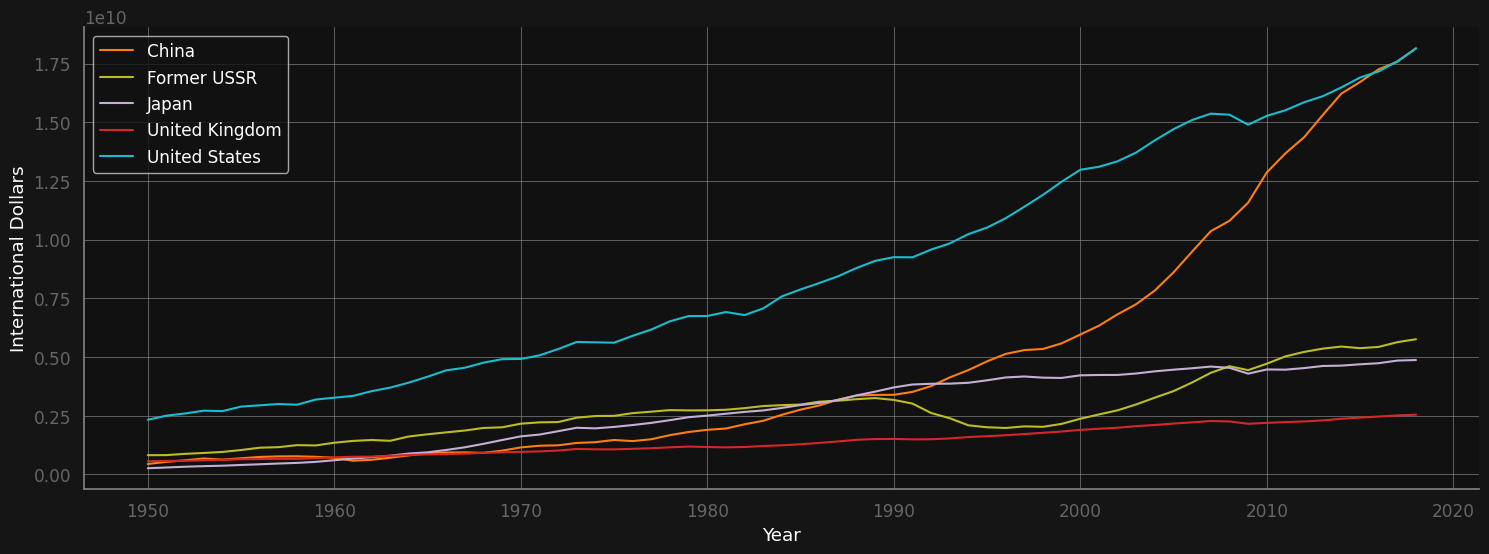

In [11]:
country = ["CHN", "SUN", "JPN", "GBR", "USA"]
start_year, end_year = (1950, 2020)

d = data.set_index(["countrycode", "year"])
d["gdp"] = d["gdppc"] * d["pop"]

plot_with_events(
    countries=country,
    country_codes=code_to_name,
    color_mapping=color_mapping,
    gdp_pc=d["gdp"],
    start_year=start_year,
    end_year=end_year,
    events=[],
    log_scale=False,
)

## Regional analysis

In [15]:
data = get_data(sheet_name="Regional data", header=(0, 1, 2), index_col=0)
data.columns = data.columns.droplevel(level=2)
data.head()

gdppc_2011                                                  
Region Western Europe Eastern Europe Western Offshoots Latin America   
1820      2306.966690          818.0       2513.045418    952.816821  \
1830      2384.314573          942.0               NaN           NaN   
1840      2579.534884          907.0               NaN           NaN   
1850      2678.000000          985.0       3474.410149   1080.657319   
1860      3034.000000         1358.0       4214.440703   1588.000000   

                                                                                
Region  Asia (East) Asia (South and South-East) Middle East Sub-Sahara Africa   
1820    1088.584951                       929.0       974.0             800.0  \
1830            NaN                         NaN         NaN               NaN   
1840            NaN                         NaN         NaN               NaN   
1850     899.657658                       929.0      1000.0             800.0   
1860            NaN                         NaN         NaN               NaN   

                  pop                                                  
Region Western Europe Western Offshoots Eastern Europe Latin America   
1820         132371.0           11231.0        90785.0       20099.0  \
1830              NaN               NaN            NaN           NaN   
1840              NaN               NaN            NaN           NaN   
1850         165348.0           26760.0       117661.0       29485.0   
1860              NaN               NaN            NaN           NaN   

                                                                               
Region Asia (South and South-East) Asia (East) Middle East Sub-Sahara Africa   
1820                      255695.0    427757.0     35600.0           60000.0  \
1830                           NaN         NaN         NaN               NaN   
1840                           NaN         NaN         NaN               NaN   
1850                      278706.0    455774.0     42000.0           65000.0   
1860                           NaN         NaN         NaN               NaN   

                    gdppc_2011  
Region      World World GDP pc  
1820    1033538.0  1101.565459  
1830          NaN          NaN  
1840          NaN          NaN  
1850    1180734.0  1225.081067  
1860          NaN          NaN

In [22]:
regional_gdppc = data["gdppc_2011"].copy()
regional_gdppc.index = pd.to_datetime(regional_gdppc.index, format="%Y")
regional_gdppc = regional_gdppc.interpolate(method="time")
regional_gdppc.head()

Region,Western Europe,Eastern Europe,Western Offshoots,Latin America,Asia (East),Asia (South and South-East),Middle East,Sub-Sahara Africa,World GDP pc
1820-01-01,2306.966690,818.0,2513.045418,952.816821,1088.584951,929.000000,974.000000,800.0,1101.565459
1830-01-01,2384.314573,942.0,2833.529572,995.434209,1025.603440,929.000000,982.667458,800.0,1142.741085
1840-01-01,2579.534884,907.0,3153.925995,1038.039930,962.639169,929.000000,991.332542,800.0,1183.905440
1850-01-01,2678.000000,985.0,3474.410149,1080.657319,899.657658,929.000000,1000.000000,800.0,1225.081067
1860-01-01,3034.000000,1358.0,4214.440703,1588.000000,944.561264,889.678669,1082.488706,800.0,1361.513017


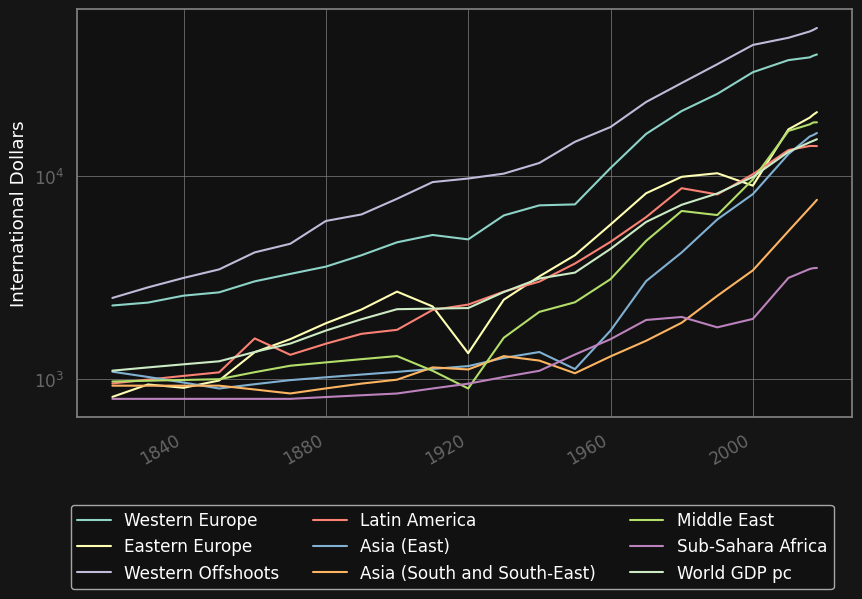

In [34]:
fig, ax = plt.subplots()
regional_gdppc.plot(ax=ax, legend=False, ylabel="International Dollars")
ax.set_yscale("log")
fig.legend(loc="lower center", ncol=3, bbox_to_anchor=[0.5, -0.1])
fig.show()